Passo 1: importar os dados do CSV para o Python

In [ ]:
import pandas as pd
nomeColunas = ["alturaSepala","larguraSepala","alturaPetala","larguraPetala","classe"]
dataFrame = pd.read_csv("/content/iris.data", names=nomeColunas)
print("Quantidade de linhas do dataframe:",len(dataFrame))
print("Quantidade de colunas do dataframe:",len(dataFrame.columns))

Quantidade de linhas do dataframe: 150
Quantidade de colunas do dataframe: 5


Passo 2: uma vez que os dados foram importados, vamos fazer uma análise exploratória,

In [ ]:
dataFrame.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Passo 3: da mesma forma que a Regressão Linear, a clusterização trabalha apenas com dados numéricos. Dessa forma, vamos ver os tipos de dados do dataFrame.

In [ ]:
dataFrame.dtypes

alturaSepala     float64
larguraSepala    float64
alturaPetala     float64
larguraPetala    float64
classe            object
dtype: object

Passo 4: uma vez que conferimos que o data frame foi importado corretamente, vamos preparar um data frame que será utilizado na aplicação de clusterização.

In [ ]:
dataFrameCluster = dataFrame.drop(columns='classe')
dataFrameCluster.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
dataFrameCluster2 = dataFrame.drop(columns='classe')
dataFrameCluster2["diferencaalturaSepalaPetala"] = dataFrameCluster2["alturaSepala"]-dataFrameCluster2["alturaPetala"]
dataFrameCluster2


,alturaSepala,larguraSepala,alturaPetala,larguraPetala,diferencaalturaSepalaPetala
0,5.1,3.5,1.4,0.2,3.7
1,4.9,3.0,1.4,0.2,3.5
2,4.7,3.2,1.3,0.2,3.4
3,4.6,3.1,1.5,0.2,3.1
4,5.0,3.6,1.4,0.2,3.6
5,5.4,3.9,1.7,0.4,3.7
6,4.6,3.4,1.4,0.3,3.2
7,5.0,3.4,1.5,0.2,3.5
8,4.4,2.9,1.4,0.2,3.0
9,4.9,3.1,1.5,0.1,3.4


Agora que o data frame cluster foi criado e está pronto para o "abate", vamos importar o algortmo K-means.

In [ ]:
from sklearn.cluster import KMeans

Agora que o algorimo K-means foi importado, vamos criar o objeto que ficará responsável pelo trabalho de clusterização. Na clusterização deve ser informada a quantidade de grupos que deseja criar no ato da instanciação do objeto.

In [ ]:
objCluster = KMeans(n_clusters=3)

Uma vez que o objeto que irá gerar os clusters foi criado, é hora de efetuar o treinamento.

In [ ]:
objCluster.fit(dataFrameCluster)

KMeans(n_clusters=3)

Agora que os clusters foram criados, vamos ver como ficou o resultado.

In [ ]:
arrayCluster = objCluster.predict(dataFrameCluster)
arrayCluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Vamos verificar os centroides calculados a partir do treinamento.

In [ ]:
objCluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Para melhorar a análise dos resultados, vamos criar um dataFrame que armazenará qual iris é e a qual grupo foi enquadrada.

In [ ]:
dataFrameResultadoCluster = dataFrame[["classe"]].copy()
dataFrameResultadoCluster["numeroCluster"]=arrayCluster
pd.set_option("display.max_rows",150)
dataFrameResultadoCluster

,classe,numeroCluster
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
5,Iris-setosa,1
6,Iris-setosa,1
7,Iris-setosa,1
8,Iris-setosa,1
9,Iris-setosa,1


Uma vez que o objeto foi treinado e gerou os centróides, vamos pedir para ele informar o grupo a qual irá pertencer iris com medidas que o objeto nunca viu.

In [ ]:
data = [
        [5.0,3.4,1.3,0.15],
        [6.6,3.2,4.6,1.6],
        [2.0,4.5,7.8,9.0]
]
objCluster.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([1, 0, 2], dtype=int32)

Vimos que há muitas iris virgínicas que foram enquadradas no grupo de iris versicolor. Diante disso, é válido fazer uma análise da distribuição dos valoresm

Text(0, 0.5, 'Largura da Sepala')

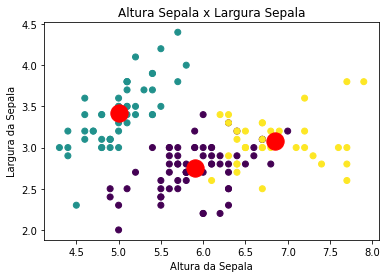

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataFrameCluster.iloc[:,0], dataFrameCluster.iloc[:,1], c=objCluster.labels_)
plt.scatter(objCluster.cluster_centers_[:,0], objCluster.cluster_centers_[:,1],s=300,color="red")
plt.title("Altura Sepala x Largura Sepala")
plt.xlabel("Altura da Sepala")
plt.ylabel("Largura da Sepala")

Vimos o gráfico que mostrou a distribuição das iris de acordo com a altura e a largura da sépala. Agora vamos fazer o mesmo, mas explorando a altura e largura da pétala.

Text(0, 0.5, 'Largura da Petala')

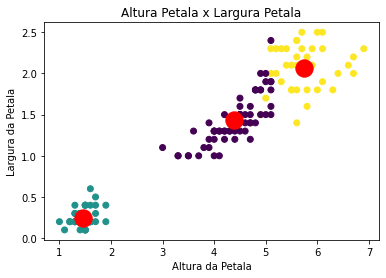

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataFrameCluster.iloc[:,2], dataFrameCluster.iloc[:,3], c=objCluster.labels_)
plt.scatter(objCluster.cluster_centers_[:,2], objCluster.cluster_centers_[:,3],s=300,color="red")
plt.title("Altura Petala x Largura Petala")
plt.xlabel("Altura da Petala")
plt.ylabel("Largura da Petala")

Pergunta de um milhão dólares: "qual a quantidade ideal de grupos para o problema que estou analisando?". Para responder a esta pergunta, utilizamos a análise de variância Elbow.

Text(0, 0.5, 'Variância')

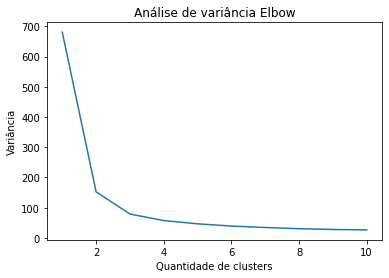

In [ ]:
variancia = []
for i in range(1,11):
  objCluster2 = KMeans(n_clusters=i)
  objCluster2.fit(dataFrameCluster)
  variancia.append(objCluster2.inertia_)

plt.plot(range(1,11),variancia)
plt.title("Análise de variância Elbow")
plt.xlabel("Quantidade de clusters")
plt.ylabel("Variância")
